# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense
import keras

In [7]:
#建立模型
model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256,  kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256,  kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10,  kernel_initializer='normal', activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________
None


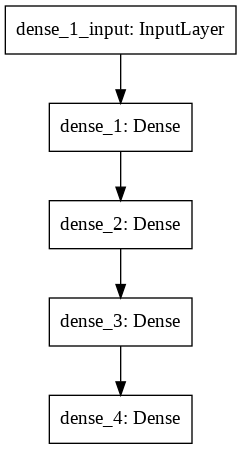

In [8]:
keras.utils.plot_model(model)

# 訓練模型

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [10]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.2386 - accuracy: 0.9278 - val_loss: 0.1030 - val_accuracy: 0.9682
Epoch 2/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.0999 - accuracy: 0.9696 - val_loss: 0.1005 - val_accuracy: 0.9688
Epoch 3/10
48000/48000 [==============================] - 5s 105us/step - loss: 0.0701 - accuracy: 0.9783 - val_loss: 0.0895 - val_accuracy: 0.9739
Epoch 4/10
48000/48000 [==============================] - 5s 107us/step - loss: 0.0527 - accuracy: 0.9837 - val_loss: 0.1100 - val_accuracy: 0.9712
Epoch 5/10
48000/48000 [==============================] - 5s 103us/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.1019 - val_accuracy: 0.9703
Epoch 6/10
48000/48000 [==============================] - 6s 116us/step - loss: 0.0349 - accuracy: 0.9888 - val_loss: 0.1107 - val_accuracy: 0.9735
Epoch 7/10
48000/48000 [==============================] - 5s 1

In [16]:
train_history.history

{'accuracy': [0.92779166,
  0.9696042,
  0.9783125,
  0.9837083,
  0.9859375,
  0.98877084,
  0.9891875,
  0.99214584,
  0.99179167,
  0.993125],
 'loss': [0.23861460005585106,
  0.09986945446312893,
  0.07005760579173996,
  0.052676029245078096,
  0.04601983499248672,
  0.0348885521161507,
  0.03385207205760344,
  0.025962765063469003,
  0.026439276005285287,
  0.020715264303241537],
 'val_accuracy': [0.9681666493415833,
  0.968833327293396,
  0.9739166498184204,
  0.9711666703224182,
  0.9702500104904175,
  0.9735000133514404,
  0.9735000133514404,
  0.9747499823570251,
  0.9775833487510681,
  0.9757500290870667],
 'val_loss': [0.103044698654674,
  0.10053282726257264,
  0.08945688741642516,
  0.10997165763362621,
  0.10188032800940952,
  0.11066370394688663,
  0.09888429196280656,
  0.10596605783996589,
  0.09323698972940414,
  0.11888354458054527]}

# 以圖形顯示訓練過程

In [11]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

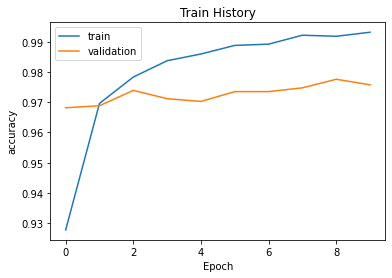

In [12]:
show_train_history(train_history,'accuracy','val_accuracy')

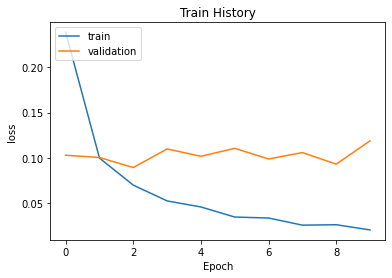

In [13]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [14]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 46us/step

accuracy= 0.9775000214576721
